### EDA 

Number OF Total Sentences 1728


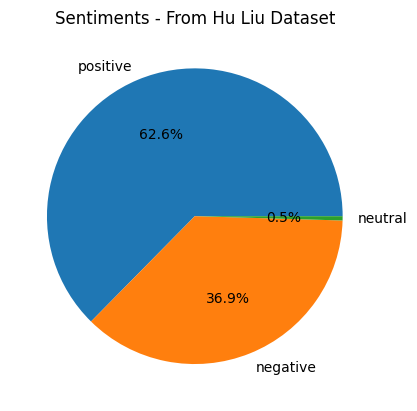

In [1]:
import openpyxl
import matplotlib.pyplot as plt

# Load data from xlsx file
wb = openpyxl.load_workbook('data.xlsx')
sheet = wb["Extracted Data"]

sentiment_column = sheet['B']
sentiment_values = [cell.value for cell in sentiment_column]

sentiment_counts = {}
for sentiment in sentiment_values:
    if sentiment not in sentiment_counts:
        sentiment_counts[sentiment] = 0
    sentiment_counts[sentiment] += 1

print("Number OF Total Sentences",len(sentiment_column))
# Calculate the percentage of each sentiment category
sentiment_percentages = [(count / len(sentiment_column)) * 100 for count in sentiment_counts.values()]

# Create a pie chart
plt.pie(sentiment_percentages, labels=sentiment_counts.keys(), autopct='%1.1f%%')
plt.title('Sentiments - From Hu Liu Dataset')
plt.show()


In [13]:
aspects_column = sheet['C']
aspects_values = [cell.value for cell in aspects_column]
aspects_values = [word for string in aspects_values for word in string.replace(',', '').split()]

aspects_counts = {}
for aspects in aspects_values:
    if aspects not in aspects_counts:
        aspects_counts[aspects] = 0
    aspects_counts[aspects] += 1


sorted_dict = dict(sorted(aspects_counts.items(), key=lambda x: x[1], reverse=True))

sorted_first_10 = dict(list(sorted_dict.items())[:10])

plt.bar(sorted_first_10.keys(), sorted_first_10.values(),edgecolor='black')
fig = plt.gcf()
fig.set_size_inches(32, 28)
fig.set_dpi(300)
plt.title('Frequency of The Aspects')
plt.xlabel('Aspects')
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.ylabel('Frequency')
plt.show()

In [5]:
from collections import Counter
lem_sheet = wb["Lemmatize Data"]
total_tokens_colum = lem_sheet['A']
tokens = list()
for x in total_tokens_colum:
    tokens.append(x.value.split())
tokens  = [word for sublist in tokens for word in sublist]
word_counts = Counter(tokens)
top_words = word_counts.most_common(20)
plt.bar(range(len(top_words)), [count for word, count in top_words])
fig = plt.gcf()
fig.set_size_inches(32, 28)
fig.set_dpi(300)
plt.xticks(range(len(top_words)), [word for word, count in top_words])
plt.xticks(fontsize=16)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()



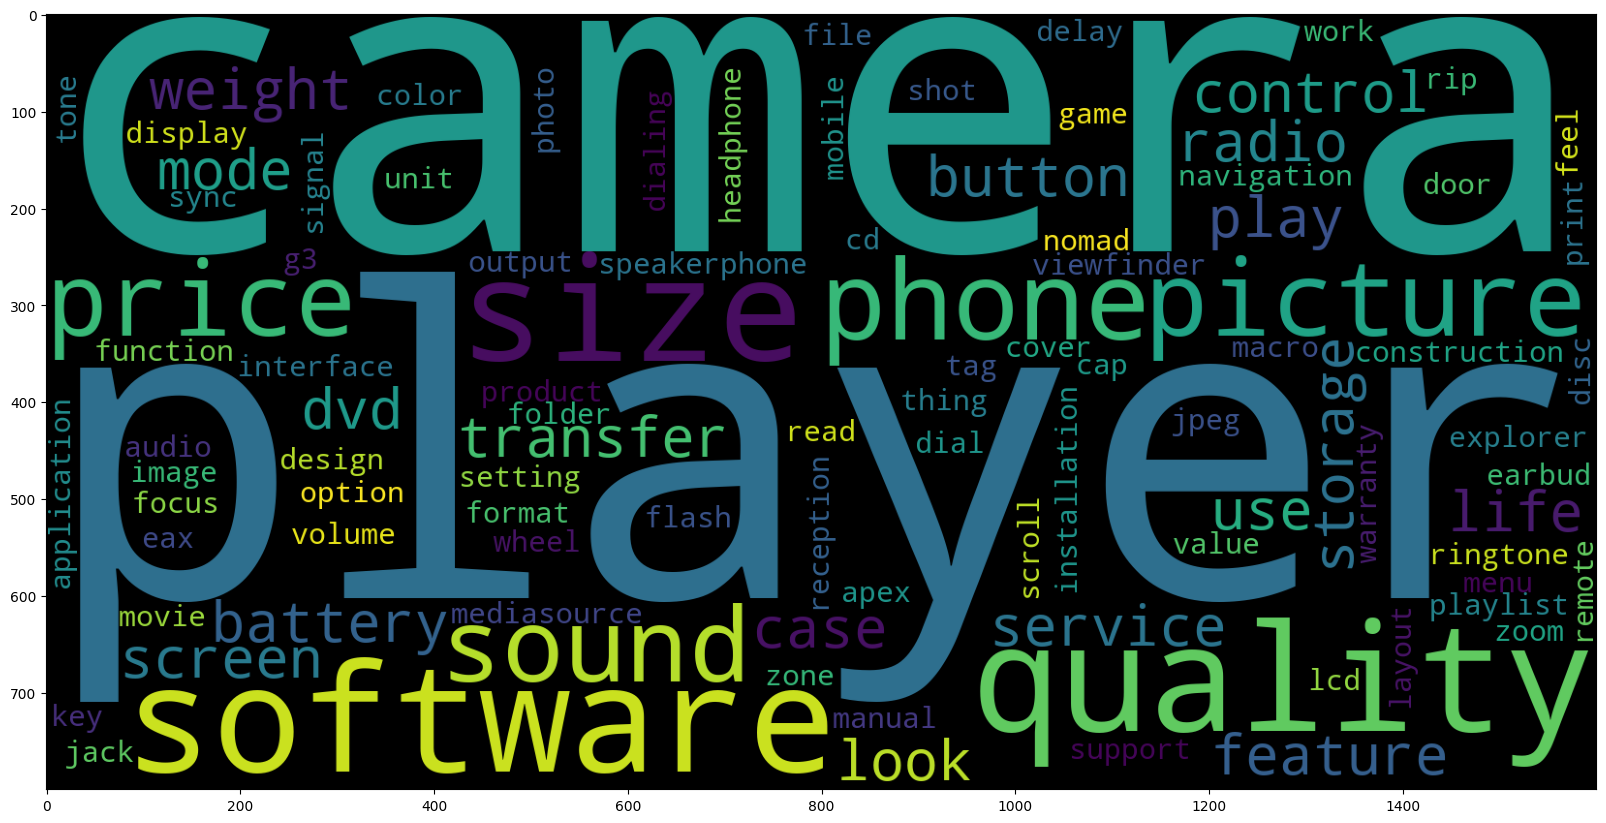

In [16]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings



aspects_column = sheet['C']
aspects_values = [cell.value for cell in aspects_column]
aspects_values = [word for string in aspects_values for word in string.replace(',', '').split()]

aspects_counts = {}
for aspects in aspects_values:
    if aspects not in aspects_counts:
        aspects_counts[aspects] = 0
    aspects_counts[aspects] += 1


sorted_dict = dict(sorted(aspects_counts.items(), key=lambda x: x[1], reverse=True))

sorted_first_10 = dict(list(sorted_dict.items())[:200])




plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 100 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(sorted_first_10))
plt.imshow(wc)

In [17]:
for word, freq in word_counts.items():
    print(f"{word}: {freq}")

ip: 2
im: 1
happy: 22
person: 4
discover: 4
button: 51
dvd: 112
look: 58
opinion: 6
apex: 43
player: 222
love: 37
pit: 19
practically: 2
play: 111
almost: 11
everything: 25
give: 35
year: 9
still: 39
perform: 2
nicely: 5
exception: 2
occasional: 4
wwhhhrrr: 1
sound: 131
motor: 2
price: 70
well: 93
spent: 3
investment: 2
pthis: 10
far: 29
nice: 47
one: 116
many: 34
way: 30
panel: 6
sleek: 10
good: 128
front: 11
layout: 5
great: 139
feature: 103
set: 24
fastforward: 1
rewind: 1
work: 114
much: 34
smoothly: 1
consistently: 3
model: 14
video: 20
alternate: 1
format: 11
vcds: 1
svcds: 2
cvds: 1
amazoncom: 1
go: 45
wrong: 7
dvdwhat: 1
get: 118
buy: 53
reviewer: 7
say: 35
would: 81
dvdrs: 1
fill: 3
file: 52
e: 2
dvdpit: 1
sure: 8
dvdpthat: 1
rare: 1
valuable: 1
audio: 19
another: 25
thing: 67
unit: 35
optical: 24
coax: 1
digital: 34
output: 9
though: 16
latter: 1
mention: 11
literature: 2
scan: 7
buying: 3
doublespeed: 1
forward: 4
speed: 10
pitchcorrected: 1
smooth: 4
twice: 2
fast: 26
remot

## NEXT
    -Word 2 VEC
    -POS Tagging
    

In [7]:
# CODE From THE MAMS-FOR-ABSA Paper
# To Check if The Tokenization is correct in my case
import spacy
import re

spacy_en = spacy.load('en_core_web_sm')

def check(x):
    return len(x) >= 1 and not x.isspace()

url = re.compile('(<url>.*</url>)')

def tokenizer(text):
    tokens = [tok.text for tok in spacy_en.tokenizer(url.sub('@URL@', text))]
    return list(filter(check, tokens))

print(tokenizer(total_tokens_colum[0].value))
print(total_tokens_colum[0].value)

['ip', 'i', 'm', 'happy', 'person', 'discover', 'ip', 'button']
ip im happy person discover ip button



### Data Is Mostely Tokenized

# Tecnologies used
    1.NLTK #For Language Analysis
    2.Torch #For ML
    3.Pandas #For DataManipulation
    4.BeautifulSoup #For XML Parsing
    5.XLSWritter
    

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])
